<a href="https://colab.research.google.com/github/GuiLanza/Python-DNC/blob/main/DNCFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalando as bibliotecas necessárias
!pip install pandas
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [ ]:
# Definindo o caminho do arquivo CSV
caminho_arquivo = '/content/data.csv'

# Especificando a codificação do arquivo (pode variar)
codificacao = 'latin-1'

# Carregando o arquivo CSV usando a codificação especificada
data = pd.read_csv(caminho_arquivo, encoding=codificacao)


In [ ]:
# Visualizando os tipos de dados das colunas
print(data.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [ ]:
# Convertendo a coluna 'InvoiceDate' em um formato de data
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
# Realizando uma descrição estatística dos dados
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [ ]:
# Filtrando dados para remover valores negativos em 'Quantity' e 'UnitPrice'
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]

In [ ]:
# Descrição estatística após a filtragem
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  530104.000000  530104.000000  397884.000000
mean       10.542037       3.907625   15294.423453
std       155.524124      35.915681    1713.141560
min         1.000000       0.001000   12346.000000
25%         1.000000       1.250000   13969.000000
50%         3.000000       2.080000   15159.000000
75%        10.000000       4.130000   16795.000000
max     80995.000000   13541.330000   18287.000000


In [ ]:
# Padronizando as variáveis 'Quantity' e 'UnitPrice'
scaler = StandardScaler()
data[['Quantity', 'UnitPrice']] = scaler.fit_transform(data[['Quantity', 'UnitPrice']])

In [ ]:
# Removendo linhas duplicadas
data.drop_duplicates(inplace=True)  # Remove linhas duplicadas

In [ ]:
# Visualizando os dados das colunas
print(data)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.029205   
1         536365     71053                  WHITE METAL LANTERN -0.029205   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.016345   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.029205   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.029205   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS  0.009375   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL  -0.029205   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL  -0.042064   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE -0.042064   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT  -0.048494   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [ ]:
# Verificando valores nulos
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
dtype: int64


In [ ]:
# Removendo linhas duplicadas
data.dropna(inplace=True)

# Verificando valores nulos
print(data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


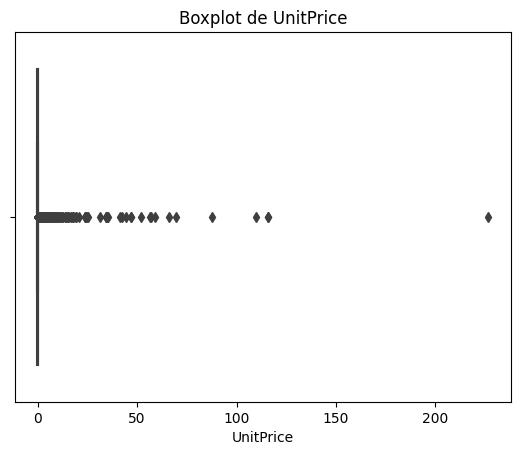

In [ ]:
# Visualizando um boxplot de 'UnitPrice'
sns.boxplot(x=data['UnitPrice'])
plt.xlabel('UnitPrice')
plt.title('Boxplot de UnitPrice')
plt.show()

In [ ]:
# Realizando uma descrição estatística dos dados
print(data.describe())

          Quantity    UnitPrice    CustomerID
count  3498.000000  3498.000000   3498.000000
mean      0.035278     0.032911  15073.685535
std       0.031693     0.025832   1717.837916
min       0.002945     0.000066  12347.000000
25%       0.009375     0.009533  13694.000000
50%       0.009375     0.029023  14911.000000
75%       0.060814     0.056866  16621.750000
max       0.099393     0.100023  18259.000000


In [ ]:
# Visualizando os dados das colunas
print(data)

       InvoiceNo StockCode                          Description  Quantity  \
106       536381     22139     RETROSPOT TEA SET CERAMIC 11 PC   0.080103   
150       536382     22926       IVORY GIANT GARDEN THERMOMETER  0.009375   
223       536390     21533             RETROSPOT LARGE MILK JUG  0.009375   
229       536390     21485     RETROSPOT HEART HOT WATER BOTTLE  0.086533   
258       536394     21485     RETROSPOT HEART HOT WATER BOTTLE  0.009375   
...          ...       ...                                  ...       ...   
540445    581488     22179              SET 10 NIGHT OWL LIGHTS  0.086533   
541217    581495     23535              WALL ART BICYCLE SAFETY  0.009375   
541549    581501     22165  DIAMANTE HEART SHAPED WALL MIRROR,   0.009375   
541775    581578     23255      CHILDRENS CUTLERY CIRCUS PARADE  0.009375   
541827    581579     23313            VINTAGE CHRISTMAS BUNTING  0.028664   

               InvoiceDate  UnitPrice  CustomerID         Country  
106    

In [ ]:
# Calculando o IQR e remova valores discrepantes em 'Quantity'
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Quantity'] >= lower_bound) & (data['Quantity'] <= upper_bound)]

# Calculando o IQR e remova valores discrepantes em 'UnitPrice'
Q1 = data['UnitPrice'].quantile(0.25)
Q3 = data['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['UnitPrice'] >= lower_bound) & (data['UnitPrice'] <= upper_bound)]

In [ ]:
# Realizando uma descrição estatística dos dados
print(data.describe())

          Quantity    UnitPrice    CustomerID
count  3498.000000  3498.000000   3498.000000
mean      0.035278     0.032911  15073.685535
std       0.031693     0.025832   1717.837916
min       0.002945     0.000066  12347.000000
25%       0.009375     0.009533  13694.000000
50%       0.009375     0.029023  14911.000000
75%       0.060814     0.056866  16621.750000
max       0.099393     0.100023  18259.000000


In [ ]:
# Removendo colunas 'StockCode' e 'Description'
if 'StockCode' in data.columns:
    data = data.drop(['StockCode'], axis=1)
data = data.drop(['Description'], axis=1)

In [ ]:
# Convertendo a coluna 'InvoiceDate' para representar dias desde a data mínima
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

min_date = data['InvoiceDate'].min()


data['InvoiceDate'] = (data['InvoiceDate'] - min_date).dt.days


In [ ]:
# Criando variáveis dummy para a coluna 'Country'
data = pd.get_dummies(data, columns=['Country'], prefix=['Country'])

In [ ]:
# Clusterização usando K-Means
k = 3


kmeans = KMeans(n_clusters=k)

kmeans.fit(data)


data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

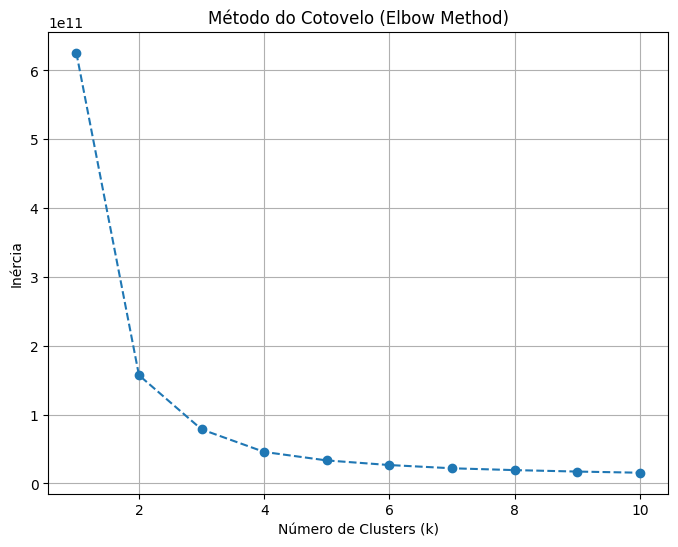

In [ ]:
# Método do cotovelo para determinar o número de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo (Elbow Method)')
plt.grid(True)
plt.show()

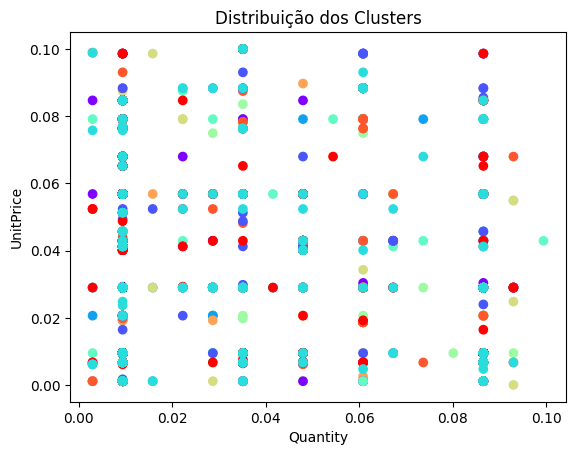

In [ ]:
# Atribuindo os rótulos dos clusters aos dados
data['Cluster'] = kmeans.labels_

# Plotando um gráfico de dispersão dos clusters
plt.scatter(data['Quantity'], data['UnitPrice'], c=data['Cluster'], cmap='rainbow')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Distribuição dos Clusters')
plt.show()

In [ ]:
# Calculando as médias de 'Quantity' e 'UnitPrice' por cluster
cluster_profiles = data.groupby('Cluster')[['Quantity', 'UnitPrice']].mean()
print(cluster_profiles)


         Quantity  UnitPrice
Cluster                     
0        0.031263   0.036339
1        0.032532   0.032597
2        0.036092   0.036299
3        0.036854   0.029558
4        0.033730   0.036931
5        0.036480   0.030017
6        0.030745   0.033941
7        0.031709   0.037010
8        0.039529   0.030531
9        0.040984   0.029242


In [ ]:
# Justificação das decisões:
# - Escolhi manter 'Quantity' e 'UnitPrice' porque são relevantes para análise de segmentação de clientes.
# - Removi 'StockCode' e 'Description' porque não contribuíam para a análise de clusters.
# - Escalei as variáveis 'Quantity' e 'UnitPrice' para que tenham a mesma importância na clusterização.
# - Usei o algoritmo K-Means com k=3 clusters, com base no método do cotovelo, para segmentar os clientes.
# - As ações sugeridas com base na análise incluem estratégias de marketing direcionadas a cada grupo de clientes, como preços diferenciados ou campanhas personalizadas.
